In [ ]:
import numpy as np
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
#Funcion that loads graph from file
def inputGraph(filePath):
    graph = nx.read_graphml(filePath)
    return graph

In [6]:
class ACO:
    def __init__(self, graph, nodes_info, adjacency_info, ants, alpha, beta, rho, q, iterations):
        #Information about nodes
        self.nodes_info = nodes_info
        #Loaded graph
        self.graph = graph
        #Adjacency between nodes
        self.adjacency_info = adjacency_info
        #Number of ants
        self.ants = ants
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q = q
        #Number of iterations
        self.iterations = iterations
        #Start value for feromone
        self.pheromone = {(u, v): 0.1 for u, v in self.graph.edges()}  # Initialize pheromone levels for each edge
        #Best possible path
        self.best_path = None
        #Lenght of best path
        self.best_path_length = float('-inf')

    #Funcion that starts program
    def run(self):
        for i in tqdm(range(self.iterations), desc='Progress'):
            paths, start_node = self.generate_paths()
            self.update_pheromone(paths, start_node)
            self.update_best_path(paths, start_node)
        return self.best_path
    #Function that generates paths from loaded graph
    def generate_paths(self):
        paths = []
        for _ in range(self.ants):
            start_node = random.choice([node for node, _ in self.nodes_info])
            path = [start_node]
            visited = set([start_node])
            while len(path) < len(self.graph.nodes()):
                next_node = self.choose_next_node(path,visited)
                if next_node is None:
                    paths.append(path)
                    break
                path.append(next_node)
                visited.add(next_node)
            
        return paths, start_node

    #Funcion that selects nest node to continue
    def choose_next_node(self, path, visited_nodes):
        current_node = path[-1]
        available_nodes = [node for node in self.graph.neighbors(current_node) if node not in visited_nodes]
        if not available_nodes:
            return None
        next_node = random.choice(available_nodes)
        
        return next_node

    #This funcion calculates probability for next edge, for path
    def calculate_probability(self, current_node, next_node):
        pheromone = self.pheromone.get((current_node, next_node), 0.1)  # Default to a small pheromone level if no edge exists
        distance = 1 / self.graph[current_node][next_node]['weight']  # Inverse of edge length
        probability = pheromone ** self.alpha * distance ** self.beta
        return probability

    #Here we update pheromone 
    def update_pheromone(self, paths, start_node):
        for path in paths:
            first_node = True
            current_node = start_node
            previous_node = start_node
            for node in path:
                if first_node:
                    current_node = node
                    first_node = False
                    continue
                previous_node = current_node
                current_node = node
                if (str(previous_node), str(current_node)) in self.pheromone:
                    self.pheromone[(str(previous_node), str(current_node))] += self.q / len(paths)
                    self.pheromone[(str(previous_node), str(current_node))] *= (1 - self.rho)
                else:
                    self.pheromone[(str(current_node), str(previous_node))] += self.q / len(paths)
                    self.pheromone[(str(current_node), str(previous_node))] *= (1 - self.rho)
    #Updateing best possible path      
    def update_best_path(self, paths, start_node):
        for path in paths:
            path_length = len(path) - 1
            if path_length > self.best_path_length:
                self.best_path_length = path_length
                self.best_path = path

    #Funcion that plots graph
    def plot_graph(self):
        first_node = True
        current_node = 0
        previous_node = 0
        edgelist = []
        for node in self.best_path:
            if first_node:
                current_node = node
                first_node = False
                continue
            previous_node = current_node
            current_node = node
            edgelist.append((str(previous_node), str(current_node)))
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True)
        plt.show()
        nx.draw_networkx_edges(self.graph, pos, edgelist=edgelist, edge_color='r')
        plt.show()

Progress: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 18.91it/s]


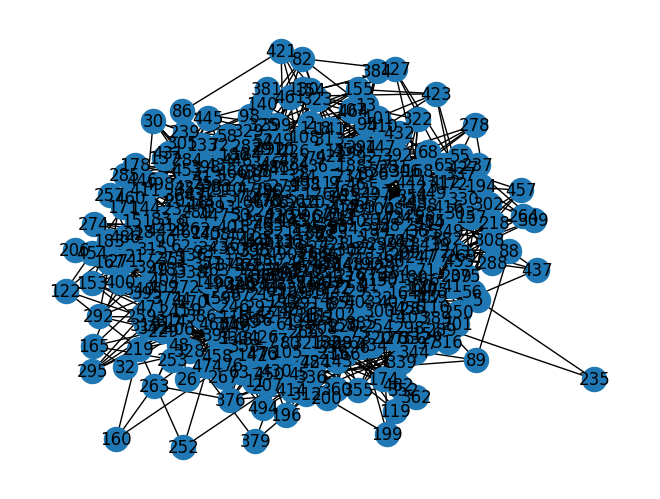

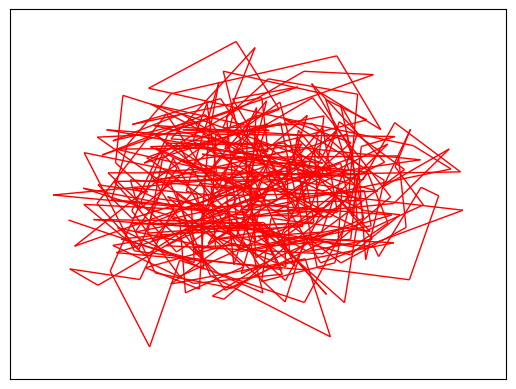

['153', '333', '373', '135', '222', '329', '390', '411', '470', '131', '173', '188', '452', '99', '7', '61', '383', '100', '124', '30', '144', '62', '486', '404', '436', '309', '55', '365', '372', '70', '330', '56', '276', '27', '225', '192', '392', '157', '220', '258', '93', '80', '267', '190', '0', '483', '347', '352', '350', '354', '13', '416', '299', '418', '286', '395', '358', '189', '360', '403', '14', '283', '484', '369', '146', '266', '359', '447', '374', '368', '183', '338', '162', '456', '123', '337', '15', '396', '81', '322', '323', '492', '495', '298', '375', '71', '34', '406', '167', '367', '46', '393', '74', '247', '348', '141', '472', '435', '38', '9', '363', '251', '156', '349', '12', '444', '230', '84', '125', '20', '441', '314', '271', '133', '499', '108', '44', '209', '102', '207', '11', '321', '40', '451', '205', '313', '421', '86', '19', '194', '264', '139', '42', '43', '302', '138', '77', '465', '361', '265', '120', '116', '385', '480', '443', '432', '168', '232',

In [7]:
graph = inputGraph('test5.graphml')
nodes_info = list(graph.nodes(data=True))
adjacency_info = list(graph.adjacency())
ants = 100
alpha = 1
beta = 5
rho = 0.1
q = 1
iterations = 1
aco = ACO(graph, nodes_info, adjacency_info, ants, alpha, beta, rho, q, iterations)
best_path = aco.run()
plot_graph = aco.plot_graph()
print()
print(best_path)
print(len(best_path))